In [2]:
#data preparing and cleaning
import pandas as pd
import numpy as np


df = pd.read_excel('ml-data.xlsx')
df

,Question,Correct_Code,Code_with_Error,Type_of_Error,Header_and_Main_Declaration,Incomprehensible_Code,Comprehensible_Code_with_logical_errors,Comprehensible_code_with_syntax_errors,Correct_code_and_output,Final_Marks,code_processed,code_with_question,code_comment,code_with_solution,ast
0,Sum of elements in an array,#include <stdio.h>\n#define MAX_SIZE 100\nint ...,#include <stdio.h>\n#define MAX_SIZE 100\nint ...,['3a'],2,2.0,2,2.0,2,10,#include <stdio.h>\n#define MAX_SIZE 100\nint ...,/*\nSum of elements in an array\n*/\n#include ...,/*\nSum of elements in an array\n*/\n#include ...,/*\nSum of elements in an array\n*/\n#include ...,(translation_unit (preproc_include path: (syst...
1,Sum of elements in an array,#include <stdio.h>\n#define MAX_SIZE 100\nint ...,#include <stdio.h>\n#define MAX_SIZE 100\nint ...,['1b'],2,2.0,2,2.0,0,8,#include <stdio.h>\n#define MAX_SIZE 100\nint ...,/*\nSum of elements in an array\n*/\n#include ...,/*\nSum of elements in an array\n*/\n#include ...,/*\nSum of elements in an array\n*/\n#include ...,(translation_unit (preproc_include path: (syst...
2,Sum of elements in an array,#include <stdio.h>\n#define MAX_SIZE 100\nint ...,#include <stdio.h>\n#define MAX_SIZE 100\nint ...,['1c'],2,2.0,1,1.0,1,7,#include <stdio.h>\n#define MAX_SIZE 100\nint ...,/*\nSum of elements in an array\n*/\n#include ...,/*\nSum of elements in an array\n*/\n#include ...,/*\nSum of elements in an array\n*/\n#include ...,(translation_unit (preproc_include path: (syst...
3,Sum of elements in an array,#include <stdio.h>\n#define MAX_SIZE 100\nint ...,#include <stdio.h>\n#define MAX_SIZE 100\nint ...,"['1e', '2d']",2,1.0,1,1.0,0,5,#include <stdio.h>\n#define MAX_SIZE 100\nint ...,/*\nSum of elements in an array\n*/\n#include ...,/*\nSum of elements in an array\n*/\n#include ...,/*\nSum of elements in an array\n*/\n#include ...,(translation_unit (preproc_include path: (syst...
4,Sum of elements in an array,#include <stdio.h>\n#define MAX_SIZE 100\nint ...,#include <stdio.h>\n#define MAX_SIZE 100\nint ...,['2b'],2,2.0,1,1.0,0,6,#include <stdio.h>\n#define MAX_SIZE 100\nint ...,/*\nSum of elements in an array\n*/\n#include ...,/*\nSum of elements in an array\n*/\n#include ...,/*\nSum of elements in an array\n*/\n#include ...,(translation_unit (preproc_include path: (syst...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,Program to swap two numbers,"#include <stdio.h>\n \n void swap(int* num1, i...","#include <stdio.h>\n \n void swap(int* num1, i...","['1c', '1e', '2b', '2c']",1,0.0,0,0.0,0,1,"#include <stdio.h>\n \n void swap(int* num1, i...",/*\nProgram to swap two numbers\n*/\n#include ...,/*\nProgram to swap two numbers\n*/\n#include ...,/*\nProgram to swap two numbers\n*/\n#include ...,(translation_unit (preproc_include path: (syst...
1172,Program to swap two numbers,"#include <stdio.h>\n \n void swap(int* num1, i...","#include <stdio.h>\n \n void swap(int* num1, i...",['1d'],2,2.0,2,1.0,1,8,"#include <stdio.h>\n \n void swap(int* num1, i...",/*\nProgram to swap two numbers\n*/\n#include ...,/*\nProgram to swap two numbers\n*/\n#include ...,/*\nProgram to swap two numbers\n*/\n#include ...,(translation_unit (preproc_include path: (syst...
1173,Program to swap two numbers,"#include <stdio.h>\n \n void swap(int* num1, i...",#include <stdio.h>\n \n int main() {\n int nu...,"['1c', '1d', '1e', '2b', '2c']",2,0.0,0,0.0,0,2,#include <stdio.h>\n \n int main() {\n int nu...,/*\nProgram to swap two numbers\n*/\n#include ...,/*\nProgram to swap two numbers\n*/\n#include ...,/*\nProgram to swap two numbers\n*/\n#include ...,(translation_unit (preproc_include path: (syst...
1174,Program to swap two numbers,"#include <stdio.h>\n \n void swap(int* num1, i...","#include <stdio.h>\n \n void swap(int* num1, i...",['2b'],2,2.0,1,2.0,1,8,"#include <stdio.h>\n \n void swap(int* num1, i...",/*\nProgram to swap two numbers\n*/\n#include ...,/*\nProgram to swap two numbers\n*/\n#include ...,/*\nProgram to swap two numbers\n*/\

In [3]:
df.isna().sum()

Question                                   0
Correct_Code                               0
Code_with_Error                            0
Type_of_Error                              0
Header_and_Main_Declaration                0
Incomprehensible_Code                      1
Comprehensible_Code_with_logical_errors    0
Comprehensible_code_with_syntax_errors     2
Correct_code_and_output                    0
Final_Marks                                0
code_processed                             0
code_with_question                         0
code_comment                               0
code_with_solution                         0
ast                                        0
dtype: int64

In [4]:
df = df.fillna(method='pad')

C:\Users\mvenk\AppData\Local\Temp\ipykernel_20640\44594444.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='pad')


In [5]:
df = df.iloc[:,4:10]
df

,Header_and_Main_Declaration,Incomprehensible_Code,Comprehensible_Code_with_logical_errors,Comprehensible_code_with_syntax_errors,Correct_code_and_output,Final_Marks
0,2,2.0,2,2.0,2,10
1,2,2.0,2,2.0,0,8
2,2,2.0,1,1.0,1,7
3,2,1.0,1,1.0,0,5
4,2,2.0,1,1.0,0,6
...,...,...,...,...,...,...
1171,1,0.0,0,0.0,0,1
1172,2,2.0,2,1.0,1,8
1173,2,0.0,0,0.0,0,2
1174,2,2.0,1,2.0,1,8


In [6]:
def create_target_column(df, column_name):
    # Create 'Target' column based on whether values in column_name are < 5 or >= 5
    df['Target'] = df[column_name].apply(lambda val: 0 if val < 5 else 1)
    return df.drop(column_name, axis=1)

df = create_target_column(df, 'Final_Marks')

In [7]:
#1q)

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd

# Function to split the dataset into training and testing sets
def split_data(df, target_column, test_size=0.3, random_state=42):
    X = df.drop(target_column, axis=1)
    y = df[target_column]
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

# Function to train the KNN model
def train_knn_model(X_train, y_train, n_neighbors=3):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(X_train, y_train)
    return model

# Function to evaluate the model and print the confusion matrix and classification report
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Confusion matrices
    conf_matrix_train = confusion_matrix(y_train, y_train_pred)
    conf_matrix_test = confusion_matrix(y_test, y_test_pred)
    
    # Classification reports
    class_report_train = classification_report(y_train, y_train_pred)
    class_report_test = classification_report(y_test, y_test_pred)
    
    # Printing the results
    print("Confusion Matrix (Training Set):")
    print(conf_matrix_train)
    
    print("\nConfusion Matrix (Test Set):")
    print(conf_matrix_test)
    
    print("\nClassification Report (Training Set):")
    print(class_report_train)
    
    print("\nClassification Report (Test Set):")
    print(class_report_test)

# Function calls
X_train, X_test, y_train, y_test = split_data(df, 'Target')  # Splitting data
model = train_knn_model(X_train, y_train)  # Training the model
evaluate_model(model, X_train, y_train, X_test, y_test)  # Evaluating the model


Confusion Matrix (Training Set):
[[271   1]
 [  2 549]]

Confusion Matrix (Test Set):
[[119   0]
 [  5 229]]

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       272
           1       1.00      1.00      1.00       551

    accuracy                           1.00       823
   macro avg       1.00      1.00      1.00       823
weighted avg       1.00      1.00      1.00       823


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       119
           1       1.00      0.98      0.99       234

    accuracy                           0.99       353
   macro avg       0.98      0.99      0.98       353
weighted avg       0.99      0.99      0.99       353



In [8]:
#2q)

import numpy as np
import pandas as pd

# Function to load data from an Excel file
def load_data(file_name, sheet_name, usecols):
    df = pd.read_excel(file_name, sheet_name=sheet_name, usecols=usecols)
    return df

# Function to extract matrices A and C from the DataFrame
def extract_matrices(df):
    A = df.iloc[:, 1:4]  # Features
    C = df.iloc[:, 4]    # Target
    return A, C

# Function to calculate the pseudoinverse of matrix A and the price of each item
def calculate_prices(A, C):
    A_inv = np.linalg.pinv(A)  # Pseudoinverse of A
    price_of_each_item = A_inv @ C
    return price_of_each_item

# Function to calculate evaluation metrics: MSE, RMSE, MAPE, and R2
def calculate_metrics(A, C, price_of_each_item):
    y_pred = A @ price_of_each_item
    MSE = np.square(np.subtract(C, y_pred)).mean()
    RMSE = np.sqrt(MSE)
    MAPE = np.mean(np.abs((C - y_pred) / C)) * 100
    R2 = 1 - (np.square(C - y_pred).sum() / np.square(C - C.mean()).sum())
    return MSE, RMSE, MAPE, R2

# Function to print results
def print_results(df, A, price_of_each_item, MSE, RMSE, MAPE, R2):
    print("Dimensionality of the vector space:", df.shape)
    print("Number of vectors:", df.shape[0])
    print("Rank of matrix A:", np.linalg.matrix_rank(A))
    print("Price of each item:", price_of_each_item)
    print("MSE:", MSE)
    print("RMSE:", RMSE)
    print("MAPE:", MAPE)
    print("R2:", R2)

# Function calls
df_purchase = load_data("Lab Session Data.xlsx", sheet_name=0, usecols='A:E')
A, C = extract_matrices(df_purchase)
price_of_each_item = calculate_prices(A, C)
MSE, RMSE, MAPE, R2 = calculate_metrics(A, C, price_of_each_item)
print_results(df_purchase, A, price_of_each_item, MSE, RMSE, MAPE, R2)


Dimensionality of the vector space: (10, 5)
Number of vectors: 10
Rank of matrix A: 3
Price of each item: [ 1. 55. 18.]
MSE: 7.569025722286982e-26
RMSE: 2.7511862391134086e-13
MAPE: 1.2592697507360183e-13
R2: 1.0


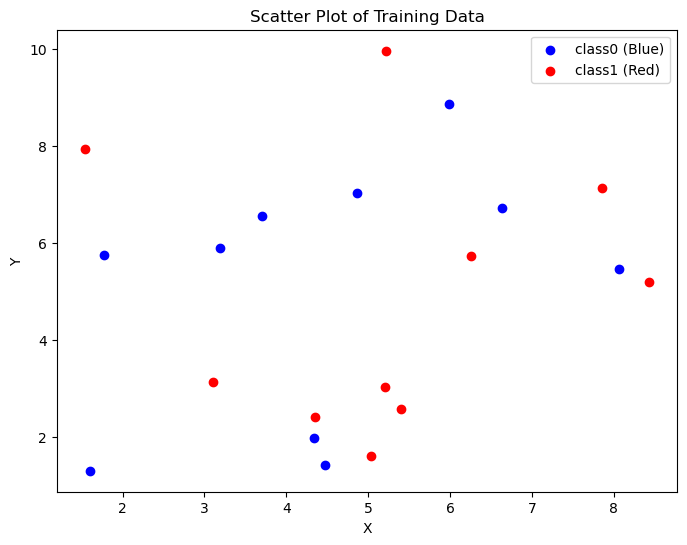

           X         Y   Class
0   8.428912  5.180796  class1
1   4.469783  1.410033  class0
2   3.102171  3.115591  class1
3   5.217840  9.959895  class1
4   7.858432  7.130886  class1
5   3.192867  5.880712  class0
6   4.353737  2.412900  class1
7   4.340471  1.974424  class0
8   3.708620  6.542679  class0
9   5.040567  1.598744  class1
10  5.402483  2.571724  class1
11  1.597546  1.295346  class0
12  5.202007  3.023461  class1
13  1.543180  7.932861  class1
14  4.860969  7.017604  class0
15  5.982024  8.860454  class0
16  8.070054  5.450277  class0
17  6.258932  5.731731  class1
18  1.771691  5.749175  class0
19  6.640971  6.711362  class0


In [10]:
#3q)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to generate random data
def generate_data(num_points=20, low=1, high=10):
    X = np.random.uniform(low, high, num_points)
    Y = np.random.uniform(low, high, num_points)
    classes = np.random.choice(['class0', 'class1'], size=num_points)
    return X, Y, classes

# Function to create a DataFrame from the data
def create_dataframe(X, Y, classes):
    df = pd.DataFrame({'X': X, 'Y': Y, 'Class': classes})
    return df

# Function to separate points based on class
def separate_classes(df):
    X_class0 = df[df['Class'] == 'class0']['X']
    Y_class0 = df[df['Class'] == 'class0']['Y']
    X_class1 = df[df['Class'] == 'class1']['X']
    Y_class1 = df[df['Class'] == 'class1']['Y']
    return X_class0, Y_class0, X_class1, Y_class1

# Function to plot the data
def plot_data(X_class0, Y_class0, X_class1, Y_class1):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_class0, Y_class0, c='blue', label='class0 (Blue)')
    plt.scatter(X_class1, Y_class1, c='red', label='class1 (Red)')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Scatter Plot of Training Data')
    plt.legend(loc='best')
    plt.show()

# Main function to perform the entire process
def main():
    X, Y, classes = generate_data()
    df = create_dataframe(X, Y, classes)
    X_class0, Y_class0, X_class1, Y_class1 = separate_classes(df)
    plot_data(X_class0, Y_class0, X_class1, Y_class1)
    print(df)

# Run the main function
if __name__ == "__main__":
    main()



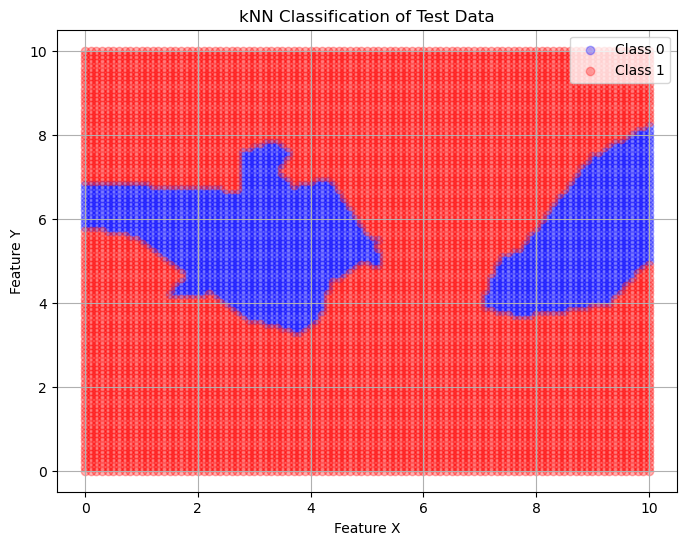

In [11]:
#4q)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Generate a grid of test data points
def generate_test_data():
    X_test = np.arange(0, 10.1, 0.1)
    Y_test = np.arange(0, 10.1, 0.1)
    X_test, Y_test = np.meshgrid(X_test, Y_test)
    test_data = pd.DataFrame({'X': X_test.ravel(), 'Y': Y_test.ravel()})
    return test_data

# Train the kNN classifier
def train_knn_classifier(df):
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(df[['X', 'Y']], df['Class'])
    return knn

# Classify the test data using the trained kNN model
def classify_test_data(knn, test_data):
    test_data['Class'] = knn.predict(test_data[['X', 'Y']])
    return test_data

# Plot the results of the classification
def plot_classification_results(test_data):
    plt.figure(figsize=(8, 6))
    plt.scatter(test_data['X'][test_data['Class'] == 'class0'], test_data['Y'][test_data['Class'] == 'class0'], color='blue', label='Class 0', alpha=0.3)
    plt.scatter(test_data['X'][test_data['Class'] == 'class1'], test_data['Y'][test_data['Class'] == 'class1'], color='red', label='Class 1', alpha=0.3)
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.title('kNN Classification of Test Data')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main function to execute the full process
def main(df):
    test_data = generate_test_data()
    knn = train_knn_classifier(df)
    classified_test_data = classify_test_data(knn, test_data)
    plot_classification_results(classified_test_data)

np.random.seed(42)  # For reproducibility
X = np.random.uniform(1, 10, 20)
Y = np.random.uniform(1, 10, 20)
classes = np.random.choice(['class0', 'class1'], size=20)
df = pd.DataFrame({'X': X, 'Y': Y, 'Class': classes})

# Call the main function
main(df)



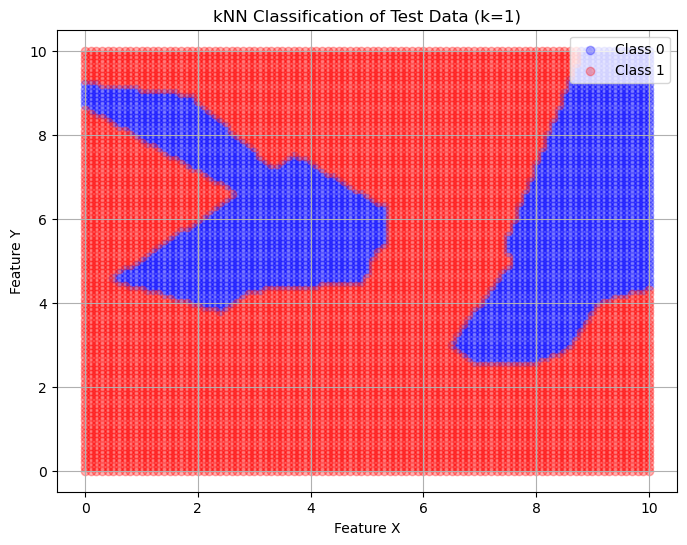

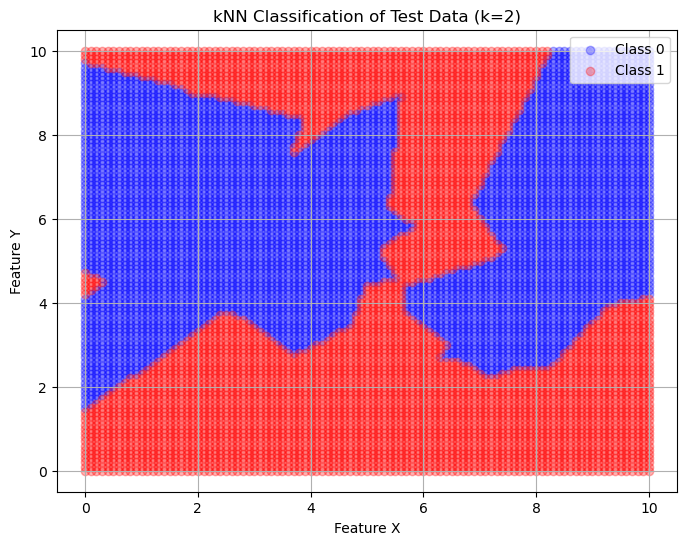

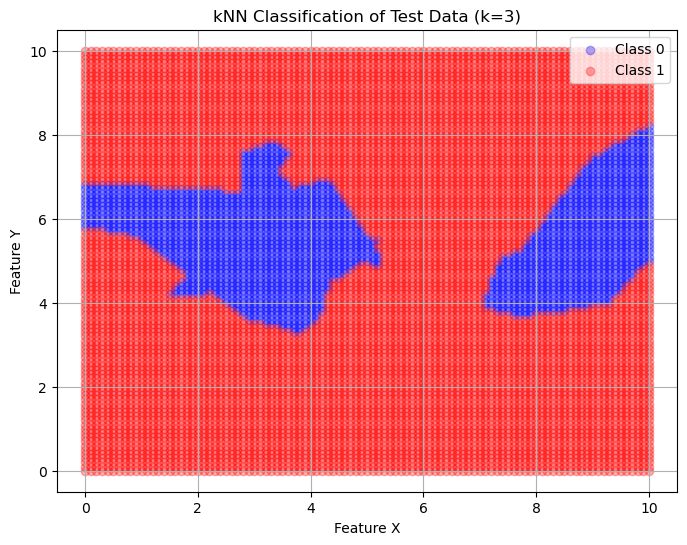

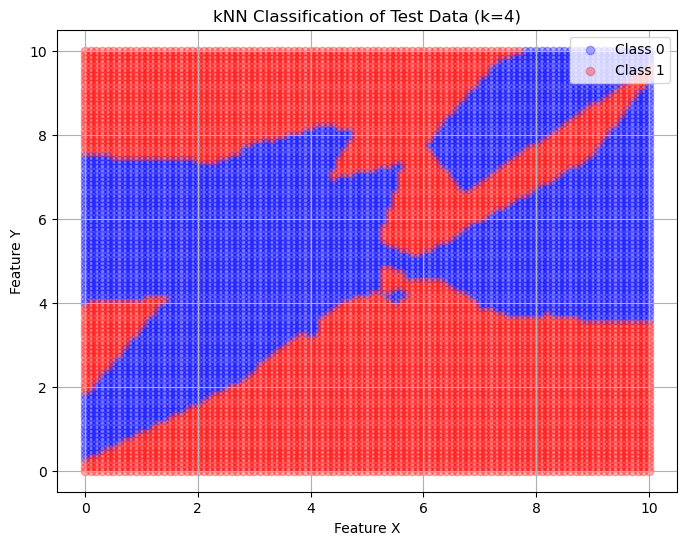

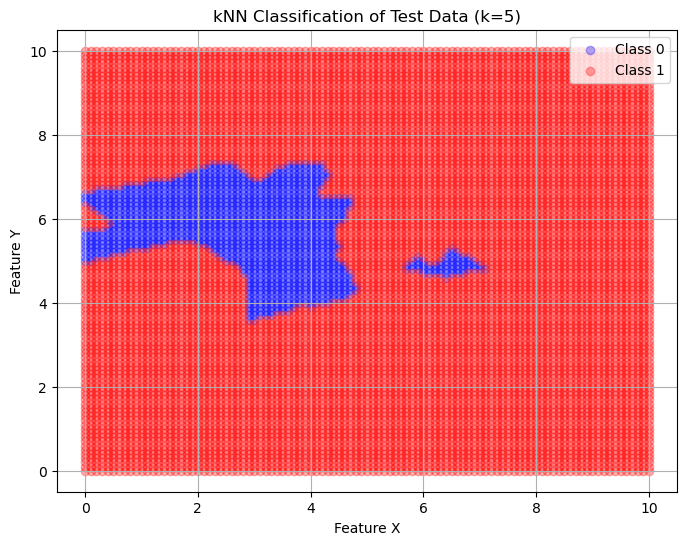

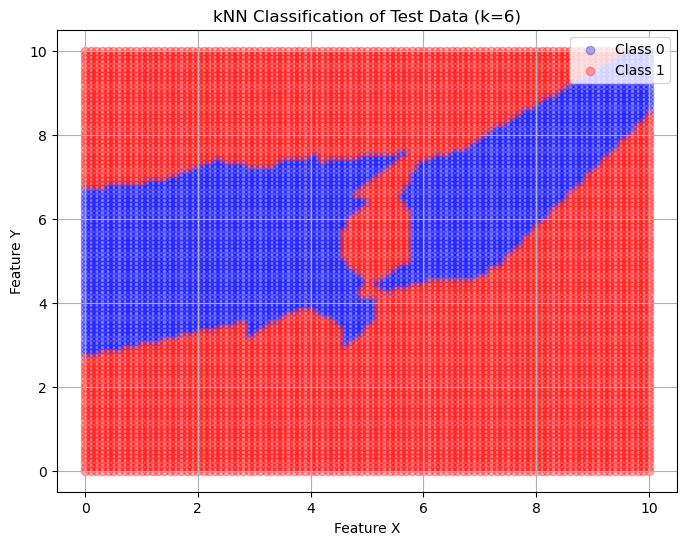

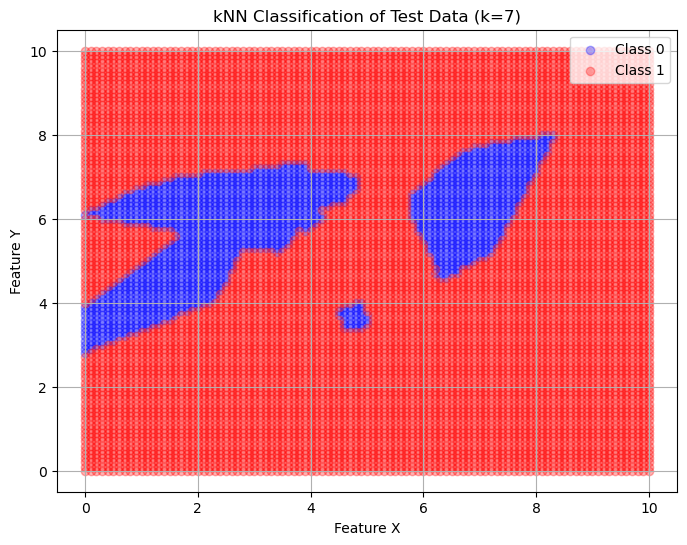

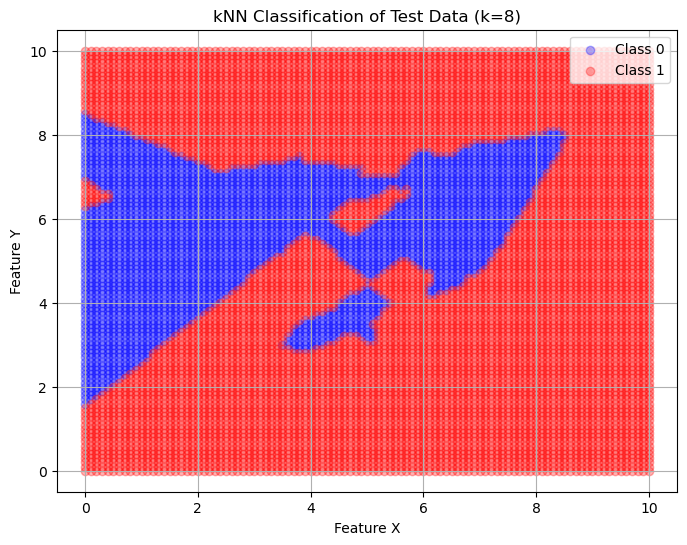

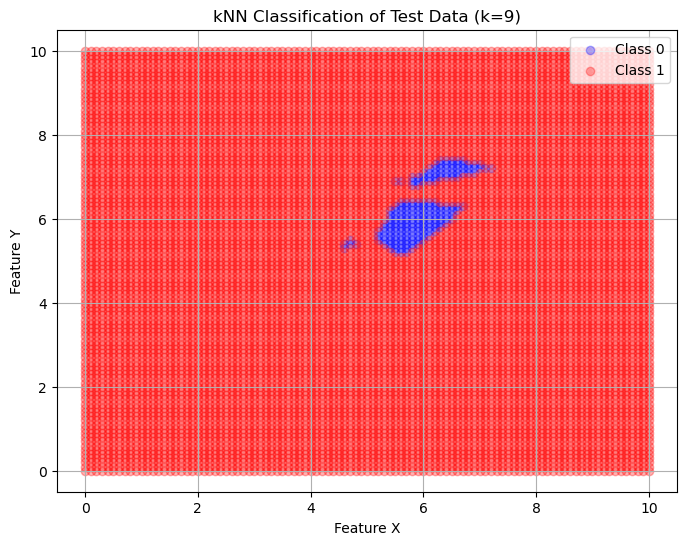

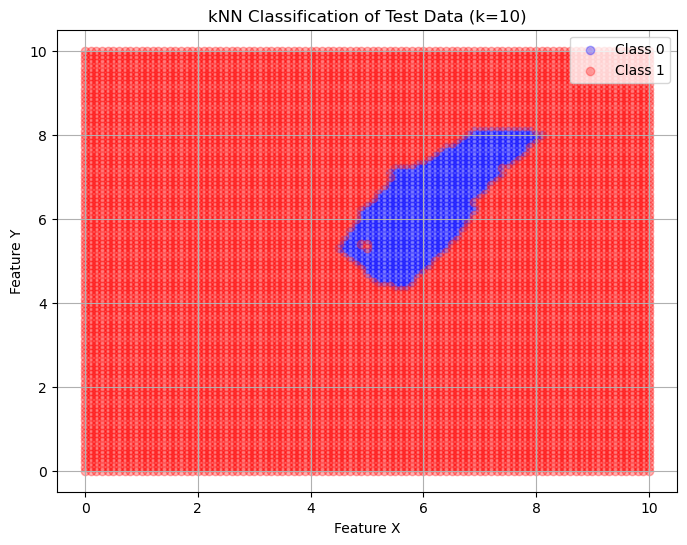

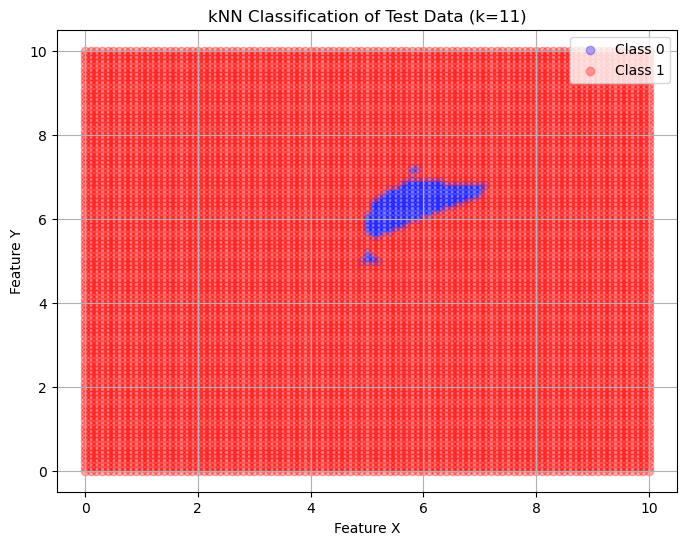

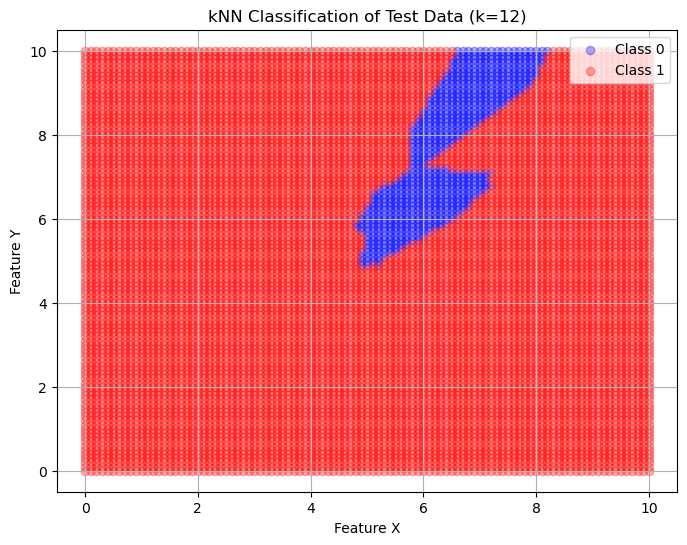

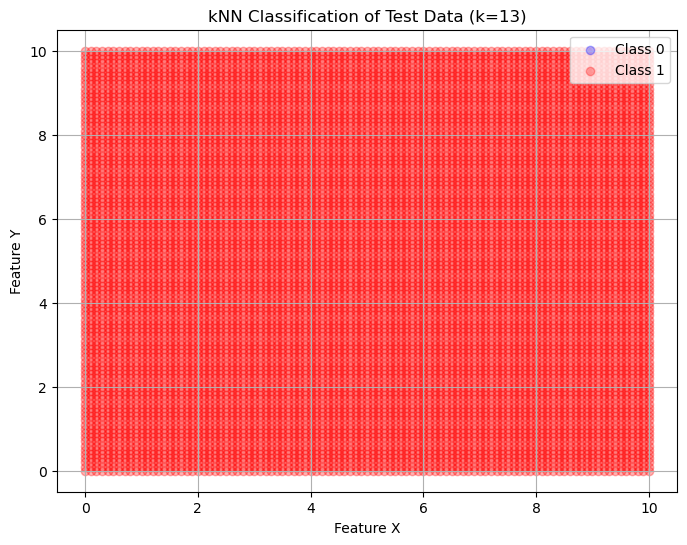

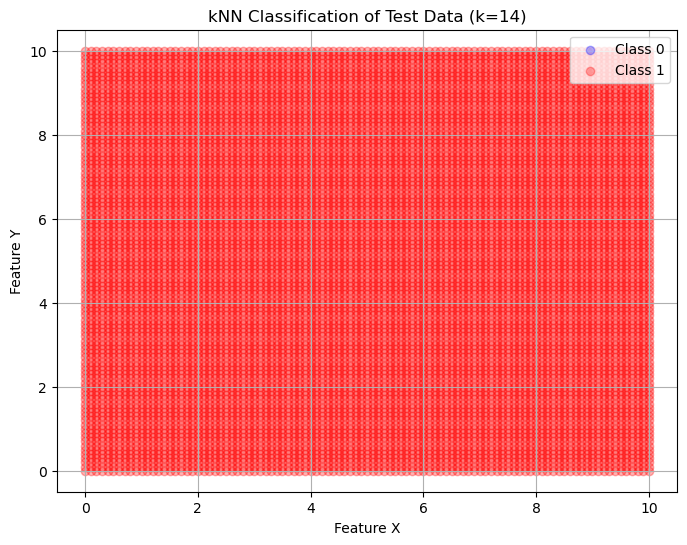

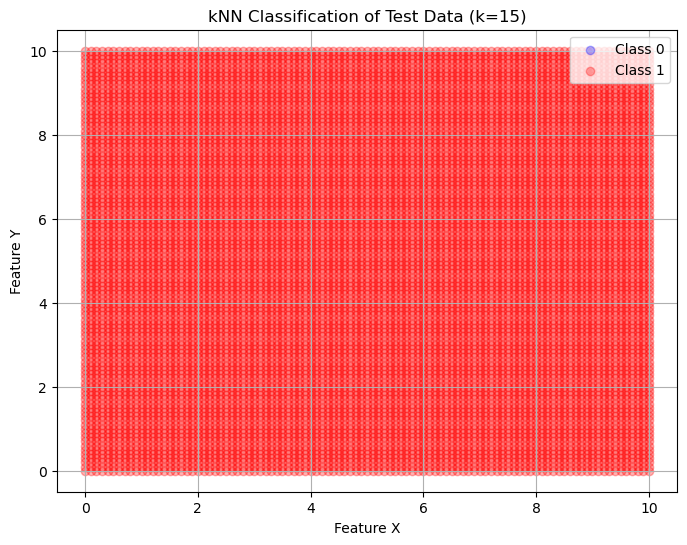

In [13]:
#5q)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Function to generate a grid of test data points
def generate_test_data():
    X_test = np.arange(0, 10.1, 0.1)
    Y_test = np.arange(0, 10.1, 0.1)
    X_test, Y_test = np.meshgrid(X_test, Y_test)
    test_data = pd.DataFrame({'X': X_test.ravel(), 'Y': Y_test.ravel()})
    return test_data

# Function to train the kNN classifier and predict classes
def train_and_predict(df, k, test_data):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(df[['X', 'Y']], df['Class'])
    test_data['Class'] = knn.predict(test_data[['X', 'Y']])
    return test_data

# Function to plot the classification results
def plot_classification(test_data, k):
    plt.figure(figsize=(8, 6))
    plt.scatter(test_data['X'][test_data['Class'] == 'class0'], test_data['Y'][test_data['Class'] == 'class0'], color='blue', label='Class 0', alpha=0.3)
    plt.scatter(test_data['X'][test_data['Class'] == 'class1'], test_data['Y'][test_data['Class'] == 'class1'], color='red', label='Class 1', alpha=0.3)
    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.title(f'kNN Classification of Test Data (k={k})')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main function to execute the kNN classification for different k values
def main(df):
    test_data = generate_test_data()
    for k in range(1, 16):
        classified_test_data = train_and_predict(df, k, test_data)
        plot_classification(classified_test_data, k)

# Example usage with a sample DataFrame `df`
# Sample DataFrame for demonstration purposes
np.random.seed(42)  # For reproducibility
X = np.random.uniform(1, 10, 20)
Y = np.random.uniform(1, 10, 20)
classes = np.random.choice(['class0', 'class1'], size=20)
df = pd.DataFrame({'X': X, 'Y': Y, 'Class': classes})

# Call the main function
main(df)


C:\Users\mvenk\AppData\Local\Temp\ipykernel_29424\3487638962.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='pad')


Question                                   0
Correct_Code                               0
Code_with_Error                            0
Type_of_Error                              0
Header_and_Main_Declaration                0
Incomprehensible_Code                      0
Comprehensible_Code_with_logical_errors    0
Comprehensible_code_with_syntax_errors     0
Correct_code_and_output                    0
Final_Marks                                0
code_processed                             0
code_with_question                         0
code_comment                               0
code_with_solution                         0
ast                                        0
dtype: int64


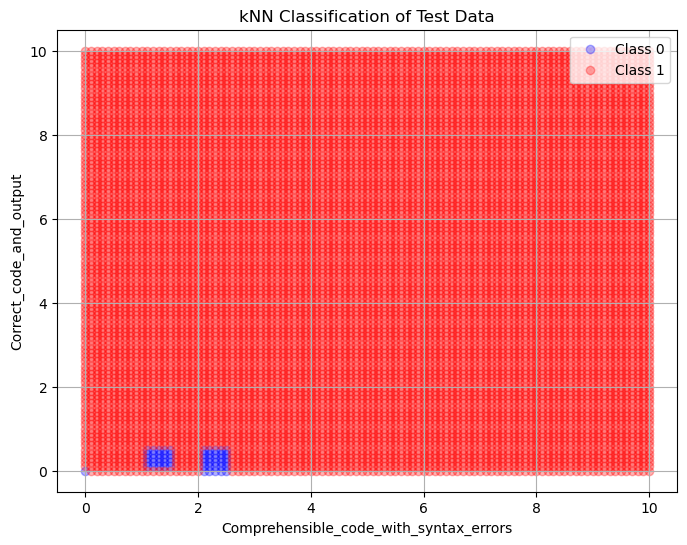

In [34]:
#6q)

#gathering and preparing data of our project and converting to dataframe

df = pd.read_excel('ml-data.xlsx')
df = df.fillna(method='pad')

# Check for missing values
print(df.isna().sum())

# Process the data
df = df.iloc[:, 4:10]
target = [(0 if data < 5 else 1) for data in df['Final_Marks']]
df = df.drop('Final_Marks', axis=1)
df['Target'] = target
df = df[['Comprehensible_code_with_syntax_errors', 'Correct_code_and_output','Target']]

# Generate test data
X_test = np.arange(0, 10.1, 0.1)
Y_test = np.arange(0, 10.1, 0.1)
X_test, Y_test = np.meshgrid(X_test, Y_test)
test_data = pd.DataFrame({
    'Comprehensible_code_with_syntax_errors': X_test.ravel(),
    'Correct_code_and_output': Y_test.ravel()
})

# Train the kNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(df[['Comprehensible_code_with_syntax_errors', 'Correct_code_and_output']], df['Target'])

# Classify the test data
test_data['Class'] = knn.predict(test_data[['Comprehensible_code_with_syntax_errors', 'Correct_code_and_output']])

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(test_data['Comprehensible_code_with_syntax_errors'][test_data['Class'] == 0],
            test_data['Correct_code_and_output'][test_data['Class'] == 0],
            color='blue', label='Class 0', alpha=0.3)
plt.scatter(test_data['Comprehensible_code_with_syntax_errors'][test_data['Class'] == 1],
            test_data['Correct_code_and_output'][test_data['Class'] == 1],
            color='red', label='Class 1', alpha=0.3)

plt.xlabel('Comprehensible_code_with_syntax_errors')
plt.ylabel('Correct_code_and_output')
plt.title('kNN Classification of Test Data')
plt.legend()
plt.grid(True)
plt.show()

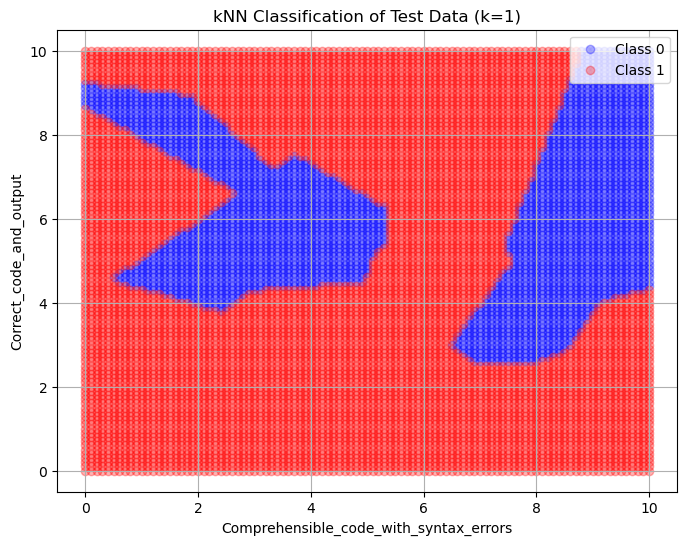

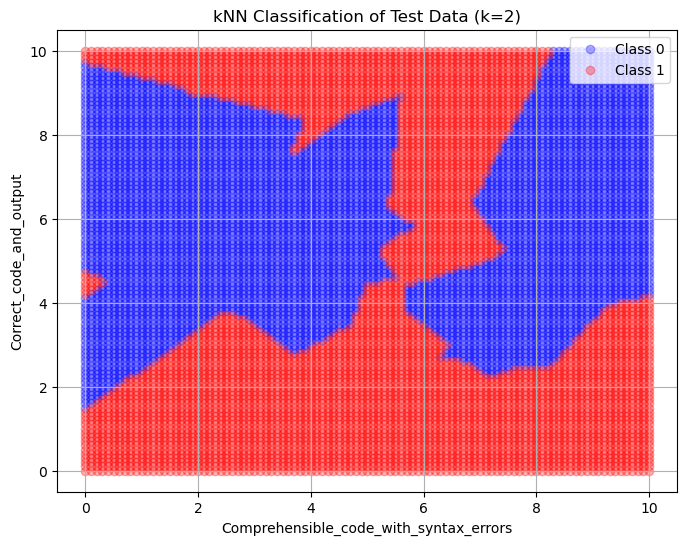

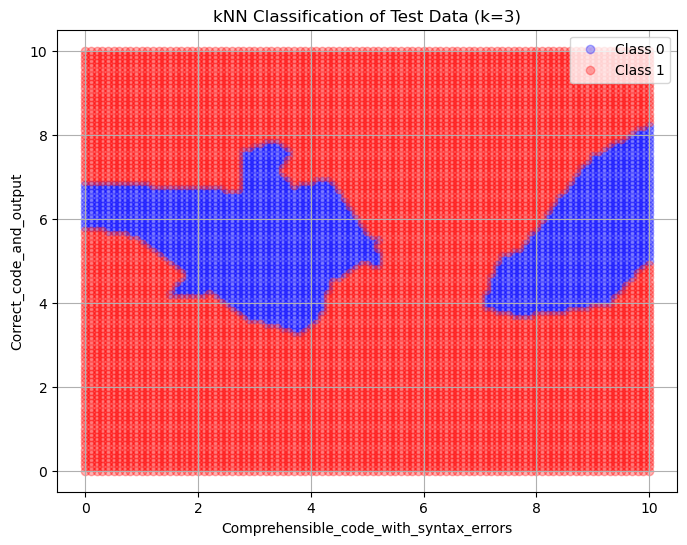

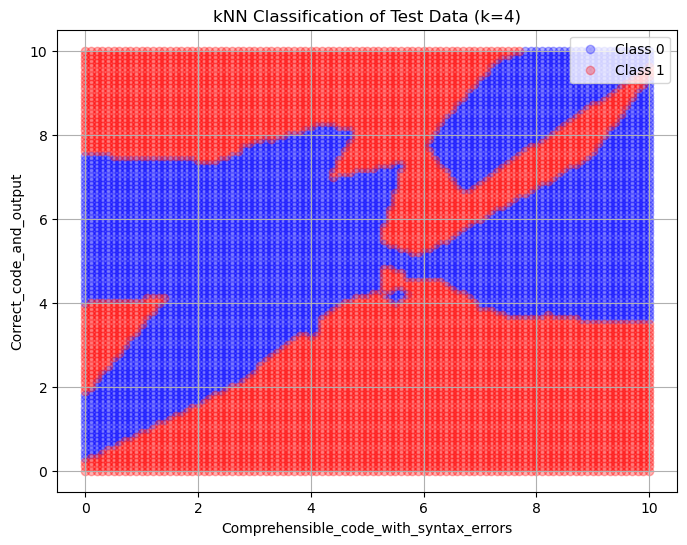

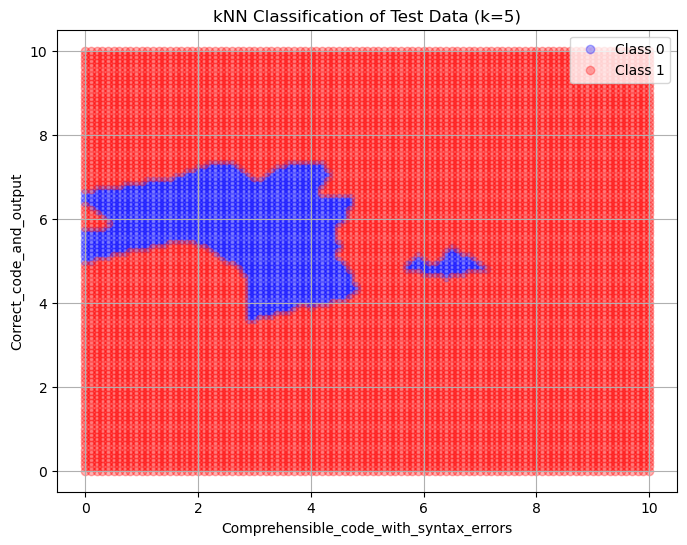

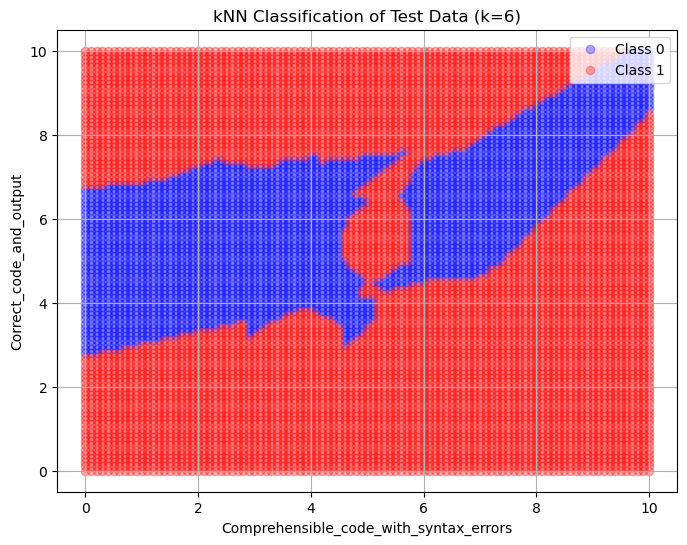

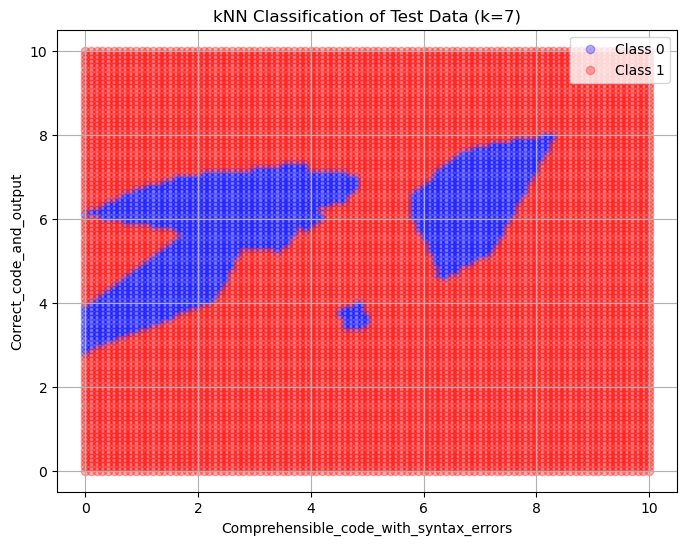

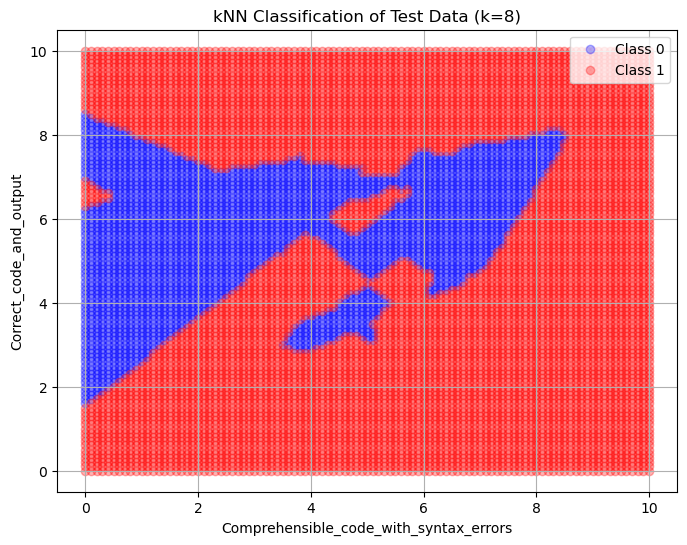

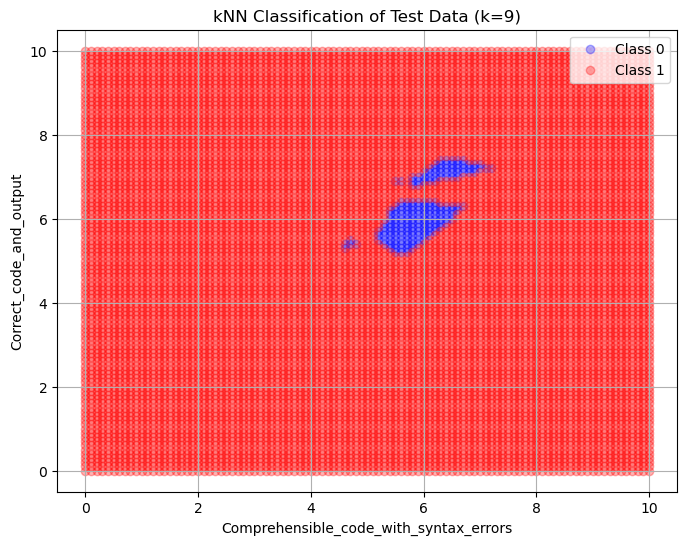

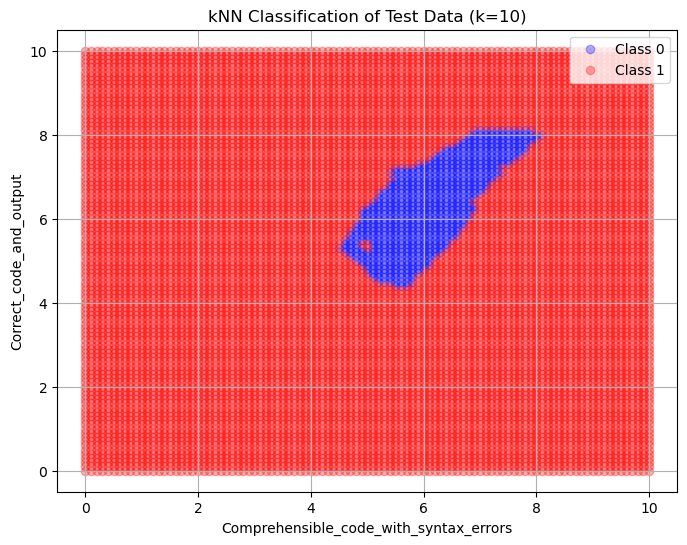

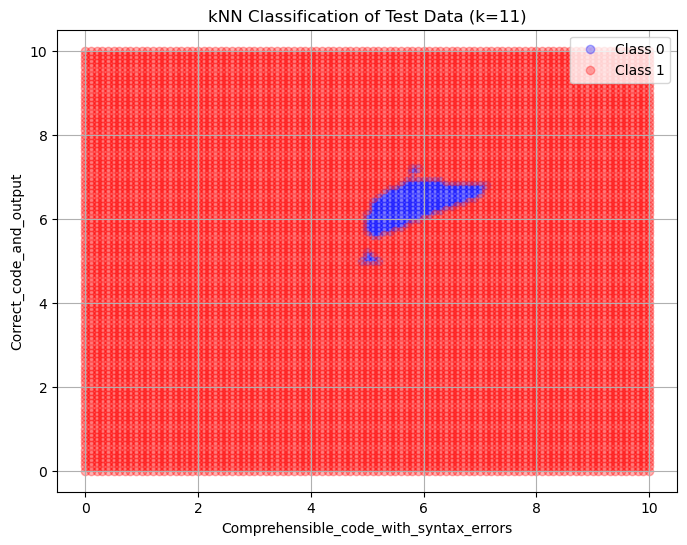

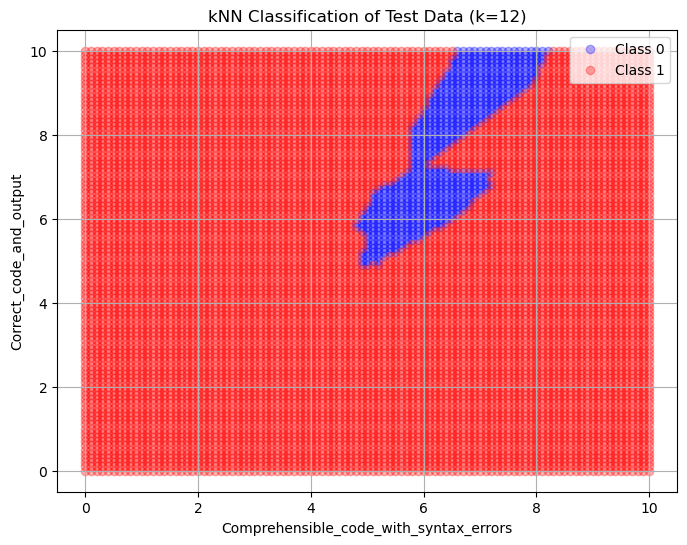

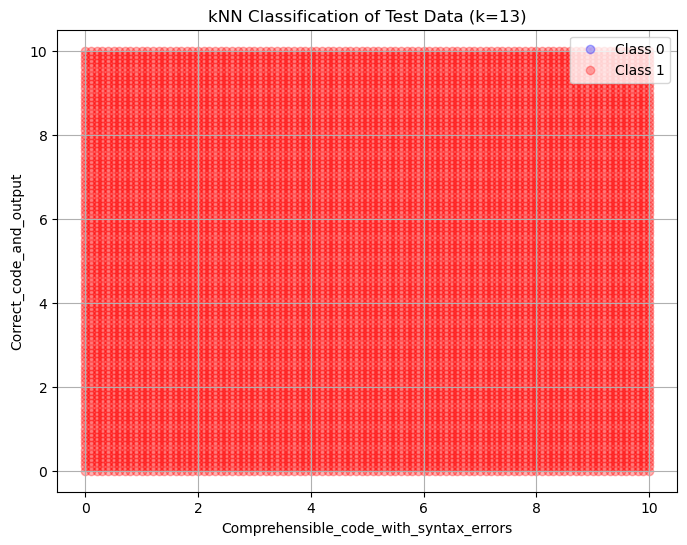

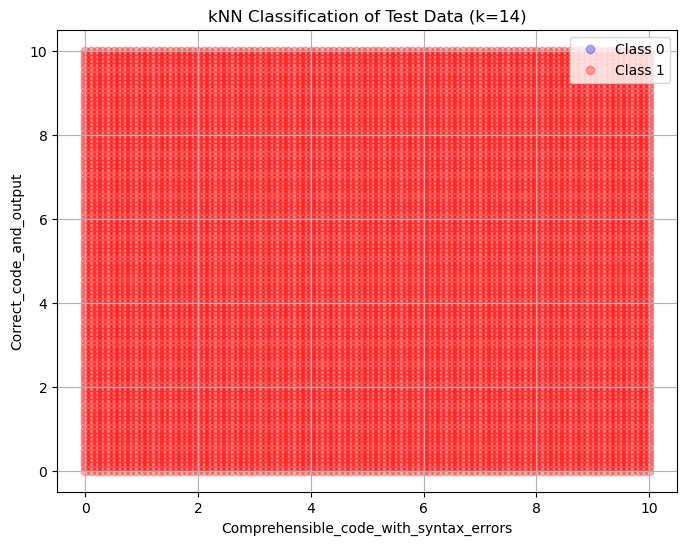

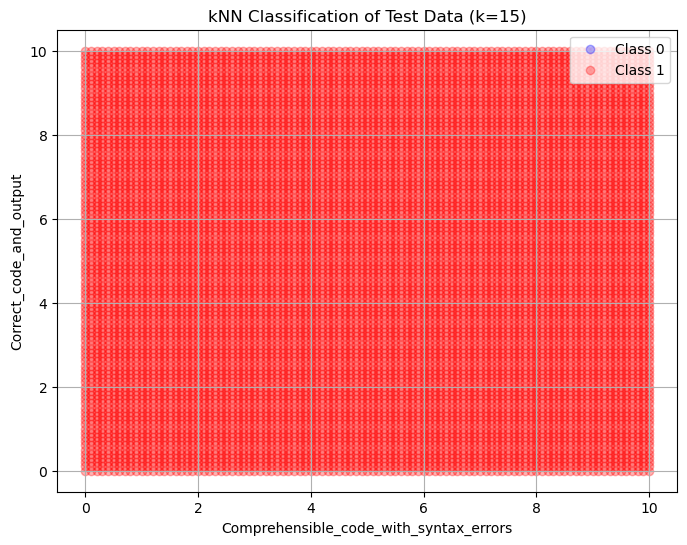

In [14]:
#A5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Function to generate test data
def generate_test_data():
    X_test = np.arange(0, 10.1, 0.1)
    Y_test = np.arange(0, 10.1, 0.1)
    X_test, Y_test = np.meshgrid(X_test, Y_test)
    test_data = pd.DataFrame({
        'Comprehensible_code_with_syntax_errors': X_test.ravel(),
        'Correct_code_and_output': Y_test.ravel()
    })
    return test_data

# Function to train the kNN classifier and predict classes
def train_and_predict(df, k, test_data):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(df[['Comprehensible_code_with_syntax_errors', 'Correct_code_and_output']], df['Target'])
    test_data['Class'] = knn.predict(test_data[['Comprehensible_code_with_syntax_errors', 'Correct_code_and_output']])
    return test_data

# Function to plot the classification results
def plot_classification(test_data, k):
    plt.figure(figsize=(8, 6))
    plt.scatter(test_data['Comprehensible_code_with_syntax_errors'][test_data['Class'] == 0], 
                test_data['Correct_code_and_output'][test_data['Class'] == 0], 
                color='blue', label='Class 0', alpha=0.3)
    plt.scatter(test_data['Comprehensible_code_with_syntax_errors'][test_data['Class'] == 1], 
                test_data['Correct_code_and_output'][test_data['Class'] == 1], 
                color='red', label='Class 1', alpha=0.3)
    plt.xlabel('Comprehensible_code_with_syntax_errors')
    plt.ylabel('Correct_code_and_output')
    plt.title(f'kNN Classification of Test Data (k={k})')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main function to execute the kNN classification for different k values
def main(df):
    test_data = generate_test_data()
    for k in range(1, 16):
        classified_test_data = train_and_predict(df, k, test_data)
        plot_classification(classified_test_data, k)

# Example DataFrame for demonstration purposes
# (Replace this with your actual DataFrame loading code)
np.random.seed(42)  # For reproducibility
X = np.random.uniform(1, 10, 20)
Y = np.random.uniform(1, 10, 20)
targets = np.random.choice([0, 1], size=20)  # Changed classes to 0 and 1
df = pd.DataFrame({
    'Comprehensible_code_with_syntax_errors': X,
    'Correct_code_and_output': Y,
    'Target': targets
})

# Call the main function
main(df)


In [15]:
#q7)
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Function to load and preprocess data
def preprocess_data(file_path):
    df = pd.read_excel(file_path)
    df = df.fillna(method='pad')  # Fill missing values

    df = df.iloc[:, 4:10]  # Select relevant columns
    target = [(0 if data < 5 else 1) for data in df['Final_Marks']]
    df = df.drop('Final_Marks', axis=1)  # Drop the target column
    df['Target'] = target

    X = df[['Comprehensible_code_with_syntax_errors', 'Correct_code_and_output']]
    y = df['Target']
    return X, y

# Function to perform grid search for the best k value
def perform_grid_search(X, y):
    param_grid = {'n_neighbors': range(1, 8)}
    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
    
    grid_search.fit(X, y)
    return grid_search

# Main function to execute the workflow
def main(file_path):
    X, y = preprocess_data(file_path)
    grid_search = perform_grid_search(X, y)
    
    print(f"Best k value: {grid_search.best_params_['n_neighbors']}")
    print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Example file path for demonstration purposes
file_path = 'ml-data.xlsx'

# Call the main function
main(file_path)



C:\Users\mvenk\AppData\Local\Temp\ipykernel_20640\1830899404.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='pad')  # Fill missing values


Best k value: 6
Best cross-validation accuracy: 0.6990
